In [1]:
#[주제]
#인천광역시의 대중교통의 문제점을 찾고자 인구의 분포도와 교통인프라의 관계를 분석함
#또한 개선,변경되면 좋은 지점을 예측하고자 하는 목표를 가짐


#[가설]
#1.유동인구가 많은 곳의 인프라는 발달되어 있다.
  #ㄴ>유동인구가 많음에도 불구하고 인프라가 상대적으로 발달되지 못한곳이 문제를 야기한다.



In [2]:
!pip install folium
import folium
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [3]:
train = pd.read_csv('data/국가철도공단_인천1호선_환승정보_20231109.csv', encoding='CP949');
train2 = pd.read_csv('data/국가철도공단_인천1호선_승강장_정보_20231010.csv', encoding='CP949');
train3= pd.read_csv('data/국가철도공단_인천1호선_역위치_20211120.csv', encoding='CP949');

In [4]:
print(train.head());
print(train2.head());
print(train3.head())

  철도운영기관명     선명    역명 환승철도운영기관  환승선명 환승이후역명    환승기점역명  차량순서  차량출입문번호
0  인천교통공사  인천1호선    계양   인천공항철도  공항철도   김포공항       서울역     3        3
1  인천교통공사  인천1호선    계양   인천공항철도  공항철도     검암  인천공항1터미널     3        3
2  인천교통공사  인천1호선  부평구청   서울교통공사   7호선    굴포천        장암     1        1
3  인천교통공사  인천1호선  부평구청   서울교통공사   7호선    굴포천        장암     8        4
4  인천교통공사  인천1호선    부평      코레일   1호선     백운  신창(순천향대)     5        1
  철도운영기관명     선명      역명  승강장번호 상하행 지상구분  역층 승강장연결 여부 스크린도어 유무 안전발판 유무
0  인천교통공사  인천1호선   간석오거리      1  상행   지하   4        Y        Y       Y
1  인천교통공사  인천1호선   간석오거리      2  하행   지하   4        Y        Y       Y
2  인천교통공사  인천1호선      갈산      1  상행   지하   2        Y        Y       Y
3  인천교통공사  인천1호선      갈산      2  하행   지하   2        Y        Y       Y
4  인천교통공사  인천1호선  경인교대입구      1  상행   지하   3        N        Y       Y
  철도운영기관명     선명  역명          경도         위도
0  인천교통공사  인천1호선  계양  126.735637  37.571462
1  인천교통공사  인천1호선  귤현  126.742654  37.566379
2  인천교통공사  인천1호선  박촌  

In [5]:
import pandas as pd

# 데이터 불러오기
train1_1 = pd.read_csv('data/국가철도공단_인천1호선_환승정보_20231109.csv', encoding='CP949')
train1_2 = pd.read_csv('data/국가철도공단_인천1호선_승강장_정보_20231010.csv', encoding='CP949')
train1_3 = pd.read_csv('data/국가철도공단_인천1호선_역위치_20211120.csv', encoding='CP949')

# '역명'을 기준으로 데이터 병합하기
merged1 = pd.merge(train1_1, train1_2, on='역명', how='outer', suffixes=('_환승정보', '_승강장정보'))
final_merged = pd.merge(merged1, train1_3, on='역명', how='outer')

# 결과 확인
print(final_merged.head())

# 결과를 새 CSV 파일로 저장
final_merged.to_csv('data/인천1호선_통합_정보.csv', index=False, encoding='utf-8-sig')

  철도운영기관명_환승정보 선명_환승정보    역명 환승철도운영기관  환승선명 환승이후역명    환승기점역명  차량순서  차량출입문번호  \
0       인천교통공사   인천1호선    계양   인천공항철도  공항철도   김포공항       서울역   3.0      3.0   
1       인천교통공사   인천1호선    계양   인천공항철도  공항철도   김포공항       서울역   3.0      3.0   
2       인천교통공사   인천1호선    계양   인천공항철도  공항철도     검암  인천공항1터미널   3.0      3.0   
3       인천교통공사   인천1호선    계양   인천공항철도  공항철도     검암  인천공항1터미널   3.0      3.0   
4       인천교통공사   인천1호선  부평구청   서울교통공사   7호선    굴포천        장암   1.0      1.0   

  철도운영기관명_승강장정보  ... 상하행  지상구분 역층 승강장연결 여부  스크린도어 유무 안전발판 유무 철도운영기관명     선명  \
0        인천교통공사  ...  상행    지상  2        Y         Y       Y  인천교통공사  인천1호선   
1        인천교통공사  ...  하행    지상  2        Y         Y       Y  인천교통공사  인천1호선   
2        인천교통공사  ...  상행    지상  2        Y         Y       Y  인천교통공사  인천1호선   
3        인천교통공사  ...  하행    지상  2        Y         Y       Y  인천교통공사  인천1호선   
4        인천교통공사  ...  상행    지하  2        Y         Y       Y     NaN    NaN   

           경도         위도  
0  126.735637  37.57146

In [6]:
import folium

# 인천 지역을 중심으로 지도 생성
map_incheon = folium.Map(location=[37.456, 126.705], zoom_start=12)

# final_merged DataFrame에서 각 역의 위치에 마커 추가
for idx, row in final_merged.iterrows():
    # NaN 값이 있는 행은 건너뛰기
    if pd.isna(row['경도']) or pd.isna(row['위도']):
        continue
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['역명'],  # 마커 클릭시 역명 표시
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(map_incheon)

# 쥬피터 노트북에서 지도를 바로 볼 수 있도록 출력
map_incheon

In [7]:
import pandas as pd

# 데이터 불러오기
train2_1 = pd.read_csv('data/국가철도공단_인천2호선_환승정보_20231109.csv', encoding='CP949')
train2_2 = pd.read_csv('data/국가철도공단_인천2호선_승강장_정보_20231010.csv', encoding='CP949')
train2_3 = pd.read_csv('data/국가철도공단_인천2호선_역위치_20231106.csv', encoding='CP949')

# '역명'을 기준으로 데이터 병합하기
merged1 = pd.merge(train2_1, train2_2, on='역명', how='outer', suffixes=('_환승정보', '_승강장정보'))
final_merged2 = pd.merge(merged1, train2_3, on='역명', how='outer')

# 결과 확인
print(final_merged2.head())

# 결과를 새 CSV 파일로 저장
final_merged2.to_csv('data/인천2호선_통합_정보.csv', index=False, encoding='utf-8-sig')

  철도운영기관명_환승정보 선명_환승정보  역명 환승철도운영기관  환승선명  환승이후역명    환승기점역명  차량순서  차량출입문번호  \
0       인천교통공사   인천2호선  검암   인천공항철도  공항철도  청라국제도시  인천공항1터미널   2.0      2.0   
1       인천교통공사   인천2호선  검암   인천공항철도  공항철도  청라국제도시  인천공항1터미널   2.0      2.0   
2       인천교통공사   인천2호선  검암   인천공항철도  공항철도      계양       서울역   6.0      4.0   
3       인천교통공사   인천2호선  검암   인천공항철도  공항철도      계양       서울역   6.0      4.0   
4       인천교통공사   인천2호선  검암   인천공항철도  공항철도  청라국제도시  인천공항1터미널   6.0      4.0   

  철도운영기관명_승강장정보  ... 상하행  지상구분 역층 승강장연결 여부  스크린도어 유무 안전발판 유무 철도운영기관명     선명  \
0        인천교통공사  ...  상행    지상  4        Y         Y       Y  인천교통공사  인천2호선   
1        인천교통공사  ...  하행    지상  4        Y         Y       Y  인천교통공사  인천2호선   
2        인천교통공사  ...  상행    지상  4        Y         Y       Y  인천교통공사  인천2호선   
3        인천교통공사  ...  하행    지상  4        Y         Y       Y  인천교통공사  인천2호선   
4        인천교통공사  ...  상행    지상  4        Y         Y       Y  인천교통공사  인천2호선   

          경도         위도  
0  126.67361  37.569223  
1  1

In [8]:
import folium

# 인천 지역을 중심으로 지도 생성
map_incheon2 = folium.Map(location=[37.456, 126.705], zoom_start=12)

# final_merged DataFrame에서 각 역의 위치에 마커 추가
for idx, row in final_merged2.iterrows():
    # NaN 값이 있는 행은 건너뛰기
    if pd.isna(row['경도']) or pd.isna(row['위도']):
        continue
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['역명'],  # 마커 클릭시 역명 표시
        icon=folium.Icon(color='lightgreen', icon='info-sign')
    ).add_to(map_incheon2)

# 쥬피터 노트북에서 지도를 바로 볼 수 있도록 출력
map_incheon2

In [9]:
import pandas as pd

# 데이터 불러오기
train3_1 = pd.read_csv('data/국가철도공단_수인선_승강장_정보_20231010.csv', encoding='CP949')
train3_2 = pd.read_csv('data/국가철도공단_수인선_역위치_20231106.csv', encoding='CP949')
train3_3 = pd.read_csv('data/국가철도공단_수인선_환승정보_20231109.csv', encoding='CP949')

# '역명'을 기준으로 데이터 병합하기
merged1 = pd.merge(train3_1, train3_2, on='역명', how='outer', suffixes=('_환승정보', '_승강장정보'))
final_merged3 = pd.merge(merged1, train3_3, on='역명', how='outer')

# 결과 확인
print(final_merged3.head())

# 결과를 새 CSV 파일로 저장
final_merged3.to_csv('data/수인선_통합_정보.csv', index=False, encoding='utf-8-sig')

  철도운영기관명_환승정보 선명_환승정보    역명  승강장번호 상하행 지상구분  역층 승강장연결 여부 스크린도어 유무 안전발판 유무  \
0          코레일    수인분당   가천대      2  상행   지하   2        Y        N       N   
1          코레일    수인분당   가천대      1  하행   지하   2        Y        N       N   
2          코레일    수인분당  강남구청      1  하행   지하   5        Y        Y       N   
3          코레일    수인분당  강남구청      1  하행   지하   5        Y        Y       N   
4          코레일    수인분당  강남구청      1  하행   지하   5        Y        Y       N   

   ...          경도         위도  철도운영기관명    선명 환승철도운영기관 환승선명 환승이후역명 환승기점역명 차량순서  \
0  ...  127.126677  37.448784      NaN   NaN      NaN  NaN    NaN    NaN  NaN   
1  ...  127.126677  37.448784      NaN   NaN      NaN  NaN    NaN    NaN  NaN   
2  ...  127.041275  37.517172      코레일  수인분당   서울교통공사  7호선     학동   부평구청  5.0   
3  ...  127.041275  37.517172      코레일  수인분당   서울교통공사  7호선     청담     장암  5.0   
4  ...  127.041275  37.517172      코레일  수인분당   서울교통공사  7호선     청담     장암  3.0   

  차량출입문번호  
0     NaN  
1     NaN  
2     3.

In [10]:
import folium

# 인천 지역을 중심으로 지도 생성
map_incheon3 = folium.Map(location=[37.456, 126.705], zoom_start=12)

# final_merged DataFrame에서 각 역의 위치에 마커 추가
for idx, row in final_merged3.iterrows():
    # NaN 값이 있는 행은 건너뛰기
    if pd.isna(row['경도']) or pd.isna(row['위도']):
        continue
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['역명'],  # 마커 클릭시 역명 표시
        icon=folium.Icon(color='orange', icon='info-sign')
    ).add_to(map_incheon3)

# 쥬피터 노트북에서 지도를 바로 볼 수 있도록 출력
map_incheon3

In [11]:
import pandas as pd

# 데이터 불러오기
train4_1 = pd.read_csv('data/국가철도공단_인천국제공항철도_환승정보_20231109.csv', encoding='CP949')
train4_2 = pd.read_csv('data/국가철도공단_공항철도_역위치_20231106.csv', encoding='CP949')
train4_3 = pd.read_csv('data/국가철도공단_공항철도_승강장_정보_20231010.csv', encoding='CP949')

# '역명'을 기준으로 데이터 병합하기
merged1 = pd.merge(train4_1, train4_2, on='역명', how='outer', suffixes=('_환승정보', '_승강장정보'))
final_merged4 = pd.merge(merged1, train4_3, on='역명', how='outer')

# 결과 확인
print(final_merged4.head())

# 결과를 새 CSV 파일로 저장
final_merged4.to_csv('data/공항철도_종합정보.csv', index=False, encoding='utf-8-sig')

  철도운영기관명_환승정보 선명_환승정보   역명 환승철도운영기관 환승선명    환승이후역명 환승기점역명  차량순서  차량출입문번호  \
0       인천공항철도    공항철도  서울역      코레일  1호선        시청    소요산   3.0      2.0   
1       인천공항철도    공항철도  서울역      코레일  1호선        시청    소요산   3.0      2.0   
2       인천공항철도    공항철도  서울역      코레일  1호선        시청    소요산   3.0      2.0   
3       인천공항철도    공항철도  서울역   서울교통공사  4호선  숙대입구(갈월)    남태령   3.0      2.0   
4       인천공항철도    공항철도  서울역   서울교통공사  4호선  숙대입구(갈월)    남태령   3.0      2.0   

  철도운영기관명_승강장정보  ...         위도   철도운영기관명    선명 승강장번호 상하행  지상구분 역층 승강장연결 여부  \
0      공항철도주식회사  ...  37.549065  공항철도주식회사  공항철도     2  상행    지하  7        Y   
1      공항철도주식회사  ...  37.549065  공항철도주식회사  공항철도     3  하행    지하  7        Y   
2      공항철도주식회사  ...  37.549065  공항철도주식회사  공항철도     1  하행    지하  7        Y   
3      공항철도주식회사  ...  37.549065  공항철도주식회사  공항철도     2  상행    지하  7        Y   
4      공항철도주식회사  ...  37.549065  공항철도주식회사  공항철도     3  하행    지하  7        Y   

   스크린도어 유무 안전발판 유무  
0         Y       N  
1         Y       

In [12]:
import folium

# 인천 지역을 중심으로 지도 생성
map_incheon4 = folium.Map(location=[37.456, 126.705], zoom_start=12)

# final_merged DataFrame에서 각 역의 위치에 마커 추가
for idx, row in final_merged4.iterrows():
    # NaN 값이 있는 행은 건너뛰기
    if pd.isna(row['경도']) or pd.isna(row['위도']):
        continue
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['역명'],  # 마커 클릭시 역명 표시
        icon=folium.Icon(color='darkblue', icon='info-sign')
    ).add_to(map_incheon4)

# 쥬피터 노트북에서 지도를 바로 볼 수 있도록 출력
map_incheon4

In [13]:
# bus_traffic = pd.read_csv('data/인천광역시_시내버스 정류소 현황_20231231.csv',encoding='CP949')
# print(bus_traffic.head());

# bus_traffic.info()

In [14]:
# import folium

# # 인천 지역을 중심으로 지도 생성
# map_incheon4 = folium.Map(location=[37.456, 126.705], zoom_start=12)

# # final_merged DataFrame에서 각 역의 위치에 마커 추가
# for idx, row in bus_traffic.iterrows():
#     # NaN 값이 있는 행은 건너뛰기
#     if pd.isna(row['경도']) or pd.isna(row['위도']):
#         continue
#     folium.Marker(
#         location=[row['위도'], row['경도']],
#         popup=row['정류소명'],  # 마커 클릭시 역명 표시
#         icon=folium.Icon(color='red', icon='info-sign')
#     ).add_to(map_incheon4)

# # 쥬피터 노트북에서 지도를 바로 볼 수 있도록 출력
# map_incheon4

In [15]:
import pandas as pd

# 각 파일 경로를 리스트에 저장
file_paths = ['data/수인선_통합_정보.csv', 'data/인천1호선_통합_정보.csv', 'data/인천2호선_통합_정보.csv', 'data/공항철도_종합정보.csv']

# 빈 DataFrame 생성
combined_df = pd.DataFrame()

for file_path in file_paths:
    # 파일을 읽어오기
    temp_df = pd.read_csv(file_path)
    
    # 필요한 컬럼만 선택
    temp_df = temp_df[['선명_환승정보','역명', '위도', '경도']]
    
    # 합쳐진 DataFrame에 추가
    combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# 중복된 행이 있을 수 있으므로 중복 제거
combined_df = combined_df.drop_duplicates()

# NaN 값이 포함된 행 제거
combined_df = combined_df.dropna()

# 결과 확인
print(combined_df.head())

# CSV 파일로 저장
combined_df.to_csv('data/통합_역정보.csv', index=False)

total_train = pd.read_csv("data/통합_역정보.csv")
total_train.info()


   선명_환승정보           역명         위도          경도
0     수인분당          가천대  37.448784  127.126677
2     수인분당         강남구청  37.517172  127.041275
10    수인분당          개포동  37.292030  127.357700
16    수인분당           구성  37.299013  127.105664
18    수인분당  기흥(백남준아트센터)  37.275657  127.115944
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   선명_환승정보  66 non-null     object 
 1   역명       66 non-null     object 
 2   위도       66 non-null     float64
 3   경도       66 non-null     float64
dtypes: float64(2), object(2)
memory usage: 2.2+ KB


In [16]:
train_traffic= pd.read_csv('data/인천광역시_유동인구_202111_sampling.csv')
print(train_traffic.head());

              센서명                   시간         위도          경도      지오해시  \
0  M-IOT-00000015  2021-11-22 14:32:00  37.431021  126.646786  wydhcyj7   
1  M-IOT-000000C4  2021-11-25 19:16:00  37.489729  126.706181  wydj72b9   
2  M-IOT-00000061  2021-11-25 19:47:00  37.448187  126.686611  wydj4c4r   
3  M-IOT-0000010C  2021-11-16 13:39:00  37.468100  126.660175  wydj4hz5   
4  M-IOT-00000068  2021-11-08 16:31:00  37.452822  126.641979  wydj1f1f   

       시    군구    동   성별  연령대  
0  인천광역시   연수구  옥련동  NaN  NaN  
1  인천광역시   부평구  산곡동  NaN  NaN  
2  인천광역시  미추홀구  주안동  NaN  NaN  
3  인천광역시  미추홀구  도화동  NaN  NaN  
4  인천광역시  미추홀구  용현동  NaN  NaN  


In [17]:
import folium
from folium.plugins import HeatMap
import pandas as pd
#유동인구의 데이터 크기가 매우 크기에 샘플링을 진행
sampled_traffic = train_traffic.sample(frac=0.000001)

# 지도의 중심을 결정하기 위해 위도와 경도의 평균값을 계산합니다.
lat_mean = sampled_traffic['위도'].mean()
lon_mean = sampled_traffic['경도'].mean()

# 인천 지역을 중심으로 하는 Folium 지도 객체를 생성합니다.
map_traffic = folium.Map(location=[lat_mean, lon_mean], zoom_start=11)

# 히트맵 레이어를 추가합니다. 데이터는 샘플링된 위도와 경도를 기반으로 합니다.
heat_data = [[row['위도'], row['경도']] for index, row in sampled_traffic.iterrows()]
HeatMap(heat_data).add_to(map_traffic)

map_traffic

In [18]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# 유동인구 데이터의 샘플링, 이 경우 전체 데이터셋의 0.1%를 샘플링
sampled_traffic = train_traffic.sample(frac=0.0001)

# 지도의 중심을 결정하기 위해 위도와 경도의 평균값을 계산합니다.
lat_mean = sampled_traffic['위도'].mean()
lon_mean = sampled_traffic['경도'].mean()

# 인천 지역을 중심으로 하는 Folium 지도 객체를 생성합니다.
map_combined = folium.Map(location=[lat_mean, lon_mean], zoom_start=11)


# final_merged 데이터프레임에서 위치에 마커 추가 (색상: 파랑) 인천1호선
for idx, row in final_merged.iterrows():
    if not pd.isna(row['경도']) and not pd.isna(row['위도']):
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=row['역명'], 
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(map_combined)

# final_merged2 데이터프레임에서 위치에 마커 추가 (색상: 연두) 인천 2호선
for idx, row in final_merged2.iterrows():
    if not pd.isna(row['경도']) and not pd.isna(row['위도']):
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=row['역명'],
            icon=folium.Icon(color='lightgreen', icon='info-sign')
        ).add_to(map_combined)

# final_merged3 데이터프레임에서 위치에 마커 추가 (색상: 주황) 수인선
for idx, row in final_merged3.iterrows():
    if not pd.isna(row['경도']) and not pd.isna(row['위도']):
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=row['역명'],
            icon=folium.Icon(color='orange', icon='info-sign')
        ).add_to(map_combined)
        
# final_merged4 데이터프레임에서 위치에 마커 추가 (색상: 주황) 수인선
for idx, row in final_merged4.iterrows():
    if not pd.isna(row['경도']) and not pd.isna(row['위도']):
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=row['역명'],
            icon=folium.Icon(color='darkblue', icon='info-sign')
        ).add_to(map_combined)

# 쥬피터 노트북에서 바로 보기
map_combined

In [19]:
data_temp = pd.read_csv('data/인천교통공사_역별일별 이용인원현황_20230630.csv', encoding='CP949')
print(data_temp.head())

   호선        통행일자  역명  구분  이용인원
0   1  2022-07-01  계양  승차  3425
1   1  2022-07-01  계양  하차  3307
2   1  2022-07-02  계양  승차  2826
3   1  2022-07-02  계양  하차  2862
4   1  2022-07-03  계양  승차  2074


In [20]:
import pandas as pd

# CSV 파일 로드
data_temp = pd.read_csv('data/인천교통공사_역별일별 이용인원현황_20230630.csv', encoding='CP949')

# 7호선 데이터 제외
data_excluding_line7 = data_temp[data_temp['호선'] != 7]

# 새로운 CSV 파일로 저장
new_file_path = 'data/인천교통공사_역별일별_이용인원현황_제외_7호선_20230630.csv'
data_excluding_line7.to_csv(new_file_path, index=False, encoding='cp949')

In [21]:
import pandas as pd
pay_ = pd.read_csv('data/인천교통공사_역별일별_이용인원현황_제외_7호선_20230630.csv', encoding='CP949')
pay_.info()
print(pay_.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41610 entries, 0 to 41609
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   호선      41610 non-null  int64 
 1   통행일자    41610 non-null  object
 2   역명      41610 non-null  object
 3   구분      41610 non-null  object
 4   이용인원    41610 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.6+ MB
   호선        통행일자  역명  구분  이용인원
0   1  2022-07-01  계양  승차  3425
1   1  2022-07-01  계양  하차  3307
2   1  2022-07-02  계양  승차  2826
3   1  2022-07-02  계양  하차  2862
4   1  2022-07-03  계양  승차  2074


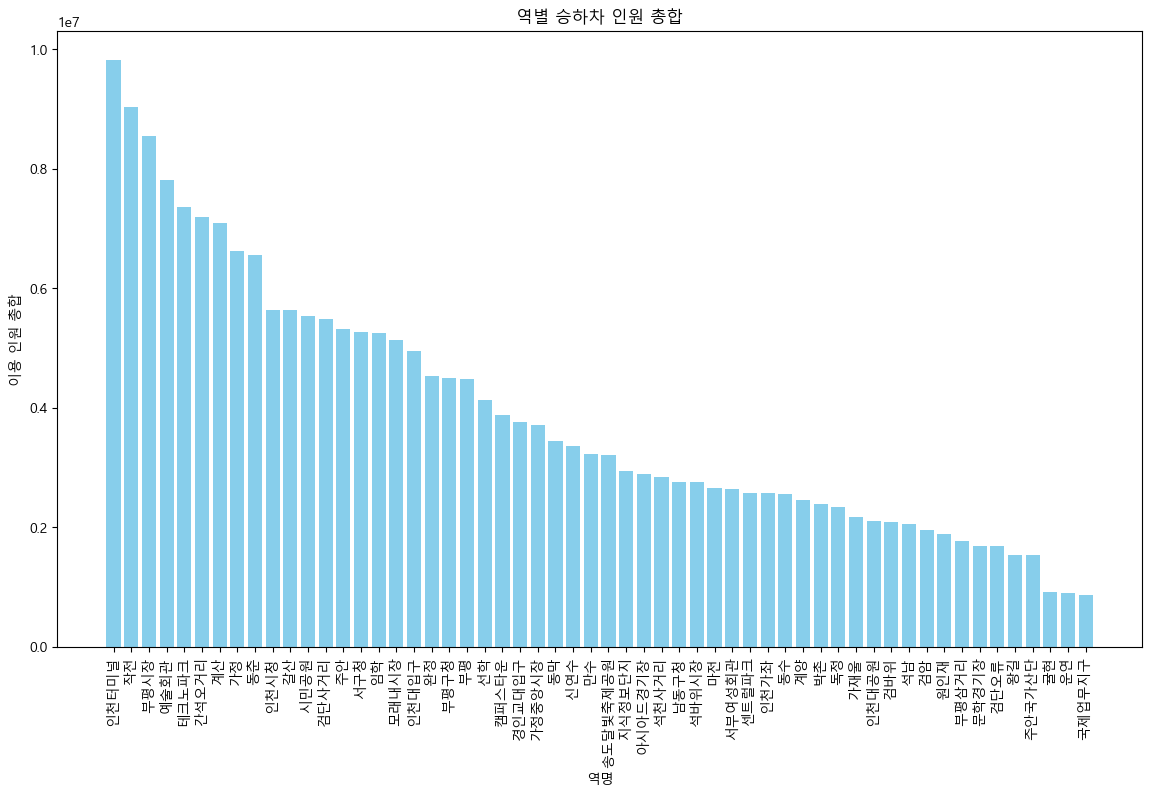

In [22]:
# 역별 승하차 인원 총합 계산
station_totals = pay_.groupby('역명').agg({'이용인원': 'sum'}).reset_index()
station_totals_sorted = station_totals.sort_values(by='이용인원', ascending=False)

import matplotlib.pyplot as plt
from matplotlib import rc

# 그래프 생성
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(14, 8))
plt.bar(station_totals_sorted['역명'], station_totals_sorted['이용인원'], color='skyblue')
plt.xlabel('역명')
plt.ylabel('이용 인원 총합')
plt.title('역별 승하차 인원 총합')
plt.xticks(rotation=90)
plt.show()

In [23]:
import pandas as pd

# 파일 로드
data_path = '인천교통공사_역별일별_이용인원현황_제외_7호선_20230630.csv'
station_info_path = '통합_역정보.csv'

data_excluding_line7 = pd.read_csv(data_path, encoding='cp949')
station_info = pd.read_csv(station_info_path, encoding='utf-8')

# 역명을 기준으로 경도와 위도 정보를 매핑
merged_data = pd.merge(data_excluding_line7, station_info[['역명', '위도', '경도']], on='역명', how='left')

# 새로운 CSV 파일로 저장
new_file_path = 'data/역별_승하차_인원_위도_경도_포함.csv'
merged_data.to_csv(new_file_path, index=False, encoding='cp949')

In [24]:
payResult = pd.read_csv('data/역별_승하차_인원_위도_경도_포함.csv', encoding='cp949')
payResult.info()
print(payResult.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45260 entries, 0 to 45259
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   호선      45260 non-null  int64  
 1   통행일자    45260 non-null  object 
 2   역명      45260 non-null  object 
 3   구분      45260 non-null  object 
 4   이용인원    45260 non-null  int64  
 5   위도      40880 non-null  float64
 6   경도      40880 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 2.4+ MB
   호선        통행일자  역명  구분  이용인원         위도          경도
0   1  2022-07-01  계양  승차  3425  37.571462  126.735637
1   1  2022-07-01  계양  승차  3425  37.571453  126.736645
2   1  2022-07-01  계양  하차  3307  37.571462  126.735637
3   1  2022-07-01  계양  하차  3307  37.571453  126.736645
4   1  2022-07-02  계양  승차  2826  37.571462  126.735637


상관계수: -0.21795223362376476


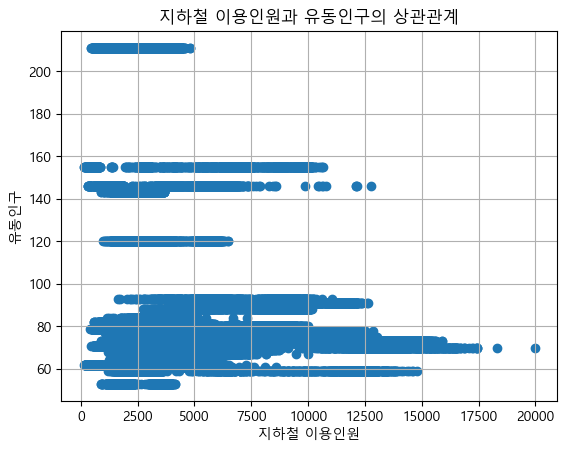

In [25]:

import pandas as pd
import matplotlib.pyplot as plt

station_usage = pd.read_csv('data/역별_승하차_인원_위도_경도_포함.csv', encoding='cp949')
population_data = station_usage.sample(frac=0.1)

# 위도와 경도를 소수점 둘째 자리까지 반올림하여 병합 기준을 만듦
station_usage['위도'] = station_usage['위도'].round(2)
station_usage['경도'] = station_usage['경도'].round(2)
population_data['위도'] = population_data['위도'].round(2)
population_data['경도'] = population_data['경도'].round(2)

# 유동인구 데이터에서 위도와 경도 기준으로 데이터 집계
population_counts = population_data.groupby(['위도', '경도']).size().reset_index(name='유동인구')

# 위도와 경도를 기준으로 두 데이터셋 병합
merged_data = pd.merge(station_usage, population_counts, on=['위도', '경도'], how='inner')

# 병합된 데이터에서 상관관계 계산
correlation = merged_data['이용인원'].corr(merged_data['유동인구'])

# 상관계수 출력
print("상관계수:", correlation)

# 데이터 시각화
plt.scatter(merged_data['이용인원'], merged_data['유동인구'])
plt.xlabel('지하철 이용인원')
plt.ylabel('유동인구')
plt.title('지하철 이용인원과 유동인구의 상관관계')
plt.grid(True)
plt.show()

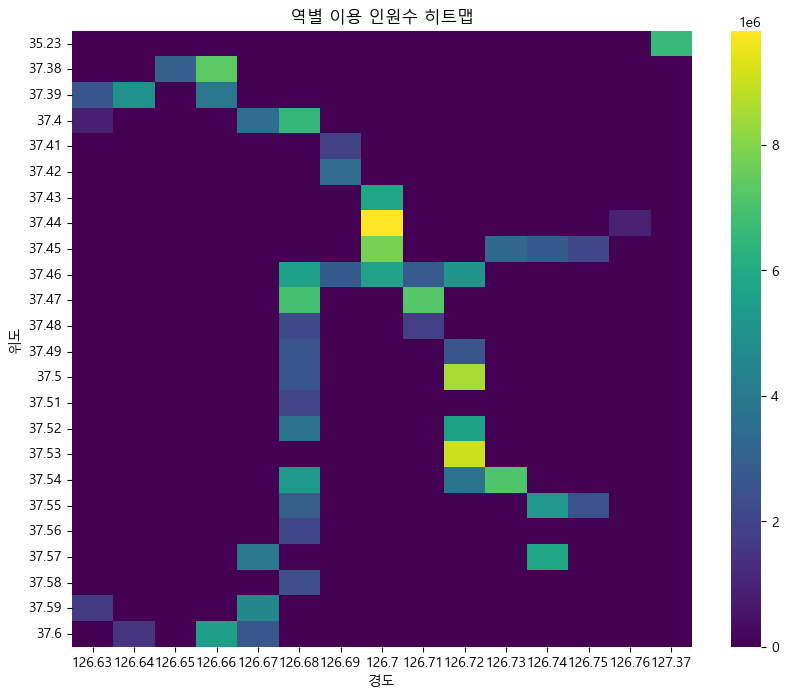

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('data/역별_승하차_인원_위도_경도_포함.csv', encoding='cp949')

# 위도와 경도를 반올림하여 각각의 격자를 생성
data['위도_반올림'] = data['위도'].round(2)
data['경도_반올림'] = data['경도'].round(2)

# 그룹화하여 이용 인원의 합을 계산
heatmap_data = data.groupby(['위도_반올림', '경도_반올림'])['이용인원'].sum().reset_index()

# 피벗 테이블 생성
heatmap_data_pivot = heatmap_data.pivot(index='위도_반올림', columns='경도_반올림', values='이용인원')

# 데이터가 많은 경우 NaN을 0으로 변환
heatmap_data_pivot.fillna(0, inplace=True)

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data_pivot, annot=False, cmap='viridis')
plt.title('역별 이용 인원수 히트맵')
plt.xlabel('경도')
plt.ylabel('위도')
plt.show()

In [27]:
import folium
from folium.plugins import HeatMap

# 유동인구 데이터 샘플링
sampled_traffic = train_traffic.sample(frac=0.001)

# 지도의 중심을 결정하기 위해 위도와 경도의 평균값을 계산
lat_mean = sampled_traffic['위도'].mean()
lon_mean = sampled_traffic['경도'].mean()

# 인천 지역을 중심으로 하는 Folium 지도 객체 생성
map_combined = folium.Map(location=[lat_mean, lon_mean], zoom_start=11)

# 히트맵 레이어 추가
heat_data = [[row['위도'], row['경도']] for index, row in sampled_traffic.iterrows()]
HeatMap(heat_data).add_to(map_combined)

# 지하철 이용인원 데이터 마커 추가
for idx, row in final_merged.iterrows():
    if not pd.isna(row['경도']) and not pd.isna(row['위도']):
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=row['역명'],
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(map_combined)

map_combined

In [35]:
from esda.moran import Moran
import libpysal as lps

# 위도와 경도 값이 올바른 형식인지 확인
print(merged_data[['위도', '경도']].head())
print(merged_data[['위도', '경도']].dtypes)

# 위도와 경도를 사용하여 지리적 가중치 행렬 생성
coords = list(zip(merged_data['위도'], merged_data['경도']))

# 거리 임계값을 조정하여 가중치 행렬 생성
try:
    w = lps.weights.DistanceBand(coords, threshold=0.1)  # 거리 임계값 조정 필요
    print("가중치 행렬 생성 성공")
except Exception as e:
    print("가중치 행렬 생성 실패:", e)

# Moran's I 계산
try:
    moran = Moran(merged_data['이용인원'].values, w)
    print("Moran's I:", moran.I)
    print("p-value:", moran.p_sim)
except Exception as e:
    print("Moran's I 계산 실패:", e)

        위도        경도
0  37.4853  126.7182
1  37.4853  126.7182
2  37.4853  126.7182
3  37.4853  126.7182
4  37.4853  126.7182
위도    float64
경도    float64
dtype: object
가중치 행렬 생성 성공
Moran's I: -0.47631817174542845
p-value: 0.001


In [36]:
import pandas as pd
from esda.moran import Moran
import libpysal as lps

# 데이터 로드
station_usage = pd.read_csv('data/역별_승하차_인원_위도_경도_포함.csv', encoding='cp949')
train_traffic = pd.read_csv('data/인천광역시_유동인구_202111_sampling.csv')

# 필요한 컬럼만 선택
population_data = train_traffic[['위도', '경도']].copy()

# 위도와 경도를 반올림하여 병합 기준 생성
station_usage['위도'] = station_usage['위도'].round(4)
station_usage['경도'] = station_usage['경도'].round(4)
population_data.loc[:, '위도'] = population_data['위도'].round(4)
population_data.loc[:, '경도'] = population_data['경도'].round(4)

# 유동인구 데이터에서 위도와 경도 기준으로 데이터 집계
population_counts = population_data.groupby(['위도', '경도']).size().reset_index(name='유동인구')

# 데이터 병합
merged_data = pd.merge(station_usage, population_counts, on=['위도', '경도'], how='inner')

# 중복된 좌표 제거
unique_coords = merged_data[['위도', '경도']].drop_duplicates()

# 데이터의 일관성을 위해 unique_coords에 대해 이용인원도 맞춰줍니다.
merged_unique = merged_data.drop_duplicates(subset=['위도', '경도'])

# 지리적 가중치 행렬 생성
coords = list(zip(unique_coords['위도'], unique_coords['경도']))
w = lps.weights.DistanceBand(coords, threshold=0.1)  # 거리 임계값 조정 필요

# Moran's I 계산
try:
    moran = Moran(merged_unique['이용인원'].values, w)
    print("Moran's I:", moran.I)
    print("p-value:", moran.p_sim)
except Exception as e:
    print("Moran's I 계산 실패:", e)

Moran's I: -0.5678227339902743
p-value: 0.001


In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import folium

# 데이터 로드
station_usage = pd.read_csv('data/역별_승하차_인원_위도_경도_포함.csv', encoding='cp949')
train_traffic = pd.read_csv('data/인천광역시_유동인구_202111_sampling.csv')

# 필요한 컬럼만 선택
population_data = train_traffic[['위도', '경도']]

# 위도와 경도를 반올림하여 병합 기준 생성
station_usage['위도'] = station_usage['위도'].round(4)
station_usage['경도'] = station_usage['경도'].round(4)
population_data['위도'] = population_data['위도'].round(4)
population_data['경도'] = population_data['경도'].round(4)

# 유동인구 데이터에서 위도와 경도 기준으로 데이터 집계
population_counts = population_data.groupby(['위도', '경도']).size().reset_index(name='유동인구')

# 데이터 병합
merged_data = pd.merge(station_usage, population_counts, on=['위도', '경도'], how='inner')

# 현재 역과의 거리를 계산하는 함수
def calculate_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

# 현재 역과의 거리 추가
current_stations = station_usage[['위도', '경도']].drop_duplicates().values
for idx, station in enumerate(current_stations):
    merged_data[f'distance_to_station_{idx}'] = calculate_distance(
        merged_data['위도'], merged_data['경도'], station[0], station[1]
    )

# 필요 없는 컬럼 제거 및 특징/라벨 분리
features = merged_data.drop(columns=['역명', '구분', '이용인원', '위도', '경도', '통행일자'])
labels = merged_data['이용인원']

# '호선'을 학습 및 예측 데이터에도 추가
features['호선'] = merged_data['호선']

# 피처 이름 확인
feature_names = features.columns.tolist()

C:\Users\rkddm\AppData\Local\Temp\ipykernel_26260\526924750.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_data['위도'] = population_data['위도'].round(4)
C:\Users\rkddm\AppData\Local\Temp\ipykernel_26260\526924750.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_data['경도'] = population_data['경도'].round(4)


In [38]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print("R^2 Score:", model.score(X_test, y_test))

# 모델 저장
import joblib
joblib.dump(model, 'random_forest_model.pkl')

R^2 Score: 0.852961664247615


['random_forest_model.pkl']

In [39]:
# 새로운 위치에 대한 유동인구 데이터 생성
new_locations = pd.DataFrame({
    '위도': np.linspace(37.4, 37.6, 100),
    '경도': np.linspace(126.7, 126.9, 100)
})

# 유동인구 데이터 병합
new_locations = pd.merge(new_locations, population_counts, on=['위도', '경도'], how='left').fillna(0)

# 거리 계산
for idx, station in enumerate(current_stations):
    new_locations[f'distance_to_station_{idx}'] = calculate_distance(
        new_locations['위도'], new_locations['경도'], station[0], station[1]
    )

# 예측에 필요한 모든 특징 포함
new_features = new_locations.drop(columns=['위도', '경도'])

# '호선' 컬럼 추가
new_features['호선'] = 1  # 임의의 호선 값을 넣어줌

# 피처 순서 맞추기
new_features = new_features[feature_names]

# 예측
new_predictions = model.predict(new_features)

# 결과 시각화
map_predictions = folium.Map(location=[37.5, 126.8], zoom_start=12)
for idx, row in new_locations.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=5,
        color='blue' if new_predictions[idx] > np.percentile(new_predictions, 75) else 'red',
        fill=True
    ).add_to(map_predictions)

map_predictions

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import folium
from folium.plugins import HeatMap

# 데이터 로드
station_usage = pd.read_csv('data/역별_승하차_인원_위도_경도_포함.csv', encoding='cp949')
train_traffic = pd.read_csv('data/인천광역시_유동인구_202111_sampling.csv')
final_merged = pd.read_csv('data/인천1호선_통합_정보.csv', encoding='utf-8-sig')
final_merged2 = pd.read_csv('data/인천2호선_통합_정보.csv', encoding='utf-8-sig')
final_merged3 = pd.read_csv('data/수인선_통합_정보.csv', encoding='utf-8-sig')
final_merged4 = pd.read_csv('data/공항철도_종합정보.csv', encoding='utf-8-sig')

# 필요한 컬럼만 선택
population_data = train_traffic[['위도', '경도']]

# 위도와 경도를 반올림하여 병합 기준 생성
station_usage['위도'] = station_usage['위도'].round(4)
station_usage['경도'] = station_usage['경도'].round(4)
population_data['위도'] = population_data['위도'].round(4)
population_data['경도'] = population_data['경도'].round(4)

# 유동인구 데이터에서 위도와 경도 기준으로 데이터 집계
population_counts = population_data.groupby(['위도', '경도']).size().reset_index(name='유동인구')

# 데이터 병합
merged_data = pd.merge(station_usage, population_counts, on=['위도', '경도'], how='inner')

# 현재 역과의 거리를 계산하는 함수
def calculate_distance(lat1, lon1, lat2, lon2):
    return np.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

# 현재 역과의 거리 추가
current_stations = station_usage[['위도', '경도']].drop_duplicates().values
for idx, station in enumerate(current_stations):
    merged_data[f'distance_to_station_{idx}'] = calculate_distance(
        merged_data['위도'], merged_data['경도'], station[0], station[1]
    )

# 필요 없는 컬럼 제거 및 특징/라벨 분리
features = merged_data.drop(columns=['역명', '구분', '이용인원', '위도', '경도', '통행일자'])
labels = merged_data['이용인원']

# '호선'을 학습 및 예측 데이터에도 추가
features['호선'] = merged_data['호선']

# 피처 이름 확인
feature_names = features.columns.tolist()

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print("R^2 Score:", model.score(X_test, y_test))

# 새로운 위치에 대한 유동인구 데이터 생성
new_locations = pd.DataFrame({
    '위도': np.linspace(37.4, 37.6, 100),
    '경도': np.linspace(126.7, 126.9, 100)
})

# 유동인구 데이터 병합
new_locations = pd.merge(new_locations, population_counts, on=['위도', '경도'], how='left').fillna(0)

# 거리 계산
for idx, station in enumerate(current_stations):
    new_locations[f'distance_to_station_{idx}'] = calculate_distance(
        new_locations['위도'], new_locations['경도'], station[0], station[1]
    )

# 예측에 필요한 모든 특징 포함
new_features = new_locations.drop(columns=['위도', '경도'])

# '호선' 컬럼 추가
new_features['호선'] = 1  # 임의의 호선 값을 넣어줌

# 피처 순서 맞추기
new_features = new_features[feature_names]

# 예측
new_predictions = model.predict(new_features)

C:\Users\rkddm\AppData\Local\Temp\ipykernel_26260\206260608.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_data['위도'] = population_data['위도'].round(4)
C:\Users\rkddm\AppData\Local\Temp\ipykernel_26260\206260608.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_data['경도'] = population_data['경도'].round(4)


R^2 Score: 0.852961664247615


In [41]:
# 유동인구 데이터의 샘플링, 이 경우 전체 데이터셋의 0.001%를 샘플링
sampled_traffic = train_traffic.sample(frac=0.001)

# 지도의 중심을 결정하기 위해 위도와 경도의 평균값을 계산합니다.
lat_mean = sampled_traffic['위도'].mean()
lon_mean = sampled_traffic['경도'].mean()

# 인천 지역을 중심으로 하는 Folium 지도 객체를 생성합니다.
map_combined = folium.Map(location=[lat_mean, lon_mean], zoom_start=11)

# 히트맵 레이어 추가
heat_data = [[row['위도'], row['경도']] for index, row in sampled_traffic.iterrows()]
HeatMap(heat_data).add_to(map_combined)

# final_merged 데이터프레임에서 위치에 마커 추가 (색상: 파랑) 인천1호선
for idx, row in final_merged.iterrows():
    if not pd.isna(row['경도']) and not pd.isna(row['위도']):
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=row['역명'], 
            icon=folium.Icon(color='blue', icon='info-sign')
        ).add_to(map_combined)

# final_merged2 데이터프레임에서 위치에 마커 추가 (색상: 연두) 인천 2호선
for idx, row in final_merged2.iterrows():
    if not pd.isna(row['경도']) and not pd.isna(row['위도']):
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=row['역명'],
            icon=folium.Icon(color='lightgreen', icon='info-sign')
        ).add_to(map_combined)

# final_merged3 데이터프레임에서 위치에 마커 추가 (색상: 주황) 수인선
for idx, row in final_merged3.iterrows():
    if not pd.isna(row['경도']) and not pd.isna(row['위도']):
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=row['역명'],
            icon=folium.Icon(color='orange', icon='info-sign')
        ).add_to(map_combined)
        
# final_merged4 데이터프레임에서 위치에 마커 추가 (색상: 주황) 공항철도
for idx, row in final_merged4.iterrows():
    if not pd.isna(row['경도']) and not pd.isna(row['위도']):
        folium.Marker(
            location=[row['위도'], row['경도']],
            popup=row['역명'],
            icon=folium.Icon(color='darkblue', icon='info-sign')
        ).add_to(map_combined)

# 새로운 예측 위치에 대한 마커 추가
for idx, row in new_locations.iterrows():
    # 파란 핀: 예측된 이용 인원이 상위 25%인 지점
    # 빨간 핀: 예측된 이용 인원이 나머지 75%인 지점
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=5,
        color='blue' if new_predictions[idx] > np.percentile(new_predictions, 75) else 'red',
        fill=True
    ).add_to(map_combined)

# 쥬피터 노트북에서 바로 보기
map_combined